## 1. Google Play Store apps e avaliações
Aplicativos mobile estão em todo lugar. Eles são fáceis de criar e podem ser lucrativos. Por causa destes dois fatores, mais e mais aplicativos tem sido desenvolvidos. Nesse notebook iremos fazer uma análise de compreensão do mercado de apps para Android comparando em torno de dez mil apps no Google Play através de diferentes categorias. Vamos buscar insights nos dados para elaborarmos estratégias visando crescimento e retenção do mesmo.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Iremos dar uma olhada nos dados, que consistem em dois arquivos:</p>
<ul>
<li><code>apps.csv</code>: contém todos os detalhes dos aplicativos no Google Play. Existem 13 features que descrevem um app.</li>
<li><code>user_reviews.csv</code>: contém 100 avaliações para cada app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">os mais úteis em primeiro</a>. Os textos em cada avaliação foram pre-processados e atribuídos com três novas features: Sentimento (Positivo, Negativo ou Neutro), Polaridade de Sentimento e Subjetividade de Sentimento.</li>
</ul>


In [1]:
# Lendo o dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Eliminando as duplicatas de app_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Mostrando a quantidade total de Apps
print('Número total de apps no dataset = ', 'apps')

# Dando uma olhada nas 5 primeiras linhas
print(apps.head())

Número total de apps no dataset =  apps
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1     

## 2. Limpeza dos dados
<p>Limpeza de dados é uma das subtarefas mais essenciais em qualquer projeto de Data Science. Mesmo sendo um processo "tedioso", seu valor nunca deve ser menosprezado.</p>
<p>Ao olharmos uma amostra aleatória das linhas do dataset(célula acima), podemos observar que algumas das entradas nas colunas como <code>Installs</code> e <code>Price</code> tem alguns caracteres especiais (<code>+</code> <code>,</code> <code>$</code>) devido à forma como os números foram representados. Isso previne que as colunas não sejam puramente numéricas, tornando difícil usá-las em futuros cálculos matemáticos. O ideal, como seus nomes sugerem, seria que essas colunas tivessem apenas digitos de [0-9].</p>
<p>Portanto, procedemos com a tarefa de limparmos os dados. Especificamente, os caracteres especiais <code>,</code> e <code>+</code> presentes nas colunas de <code>Installs</code> e <code>$</code> presentes na coluna de <code>Price</code> precisam ser removidos.

É uma boa prática imprimir um sumário de seu dataframe após completar o processo de limpeza de dados. Iremos usar o método info() para conseguir o mesmo.    

In [2]:
# lista dos caracteres a serem removidos
chars_to_remove = ['+',',','$']
# Lista de nomes das colunas a serem limpadas
cols_to_clean = ['Installs', 'Price']

# Loop para cada coluna em cols_to_clean
for col in cols_to_clean:
    # Loop para cada caractere em chars_to_remove
    for char in chars_to_remove:
        # Substituindo o caractere por uma string em branco
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Imprimindo o sumário do dataframe dos Apps
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Corrigindo os tipos de dados
<p>No passo anterior percebemos que <code>Installs</code> e <code>Price</code> foram categorizados como um datatype<code>object</code> (e não como <code>int</code> ou <code>float</code> como gostaríamos. Isso ocorre porque originalmente essas duas colunas tinham tipos de entrada mistos: dígitos e caracteres especiais.
<p>As quatro features com as quais iremos trabalhar com mais frequência daqui para frente são <code>Installs</code>, <code>Size</code>, <code>Rating</code> e <code>Price</code>. Enquanto <code>Size</code> e <code>Rating</code> são ambos <code>float</code> (ou seja, tipos de dados puramente numéricos), ainda temos que trabalhar em <code>Installs</code> e <code>Price</code> para torná-los númericos.</p>

In [3]:
import numpy as np

# Convertendo Installs para o datatype Float
apps['Installs'] = apps['Installs'].astype('float')

# Convertendo Price para o datatype Float
apps['Price'] = apps['Price'].astype('float')

# Checando os datatypes do dataframe Apps
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


## 4. Explorando as categorias dos Apps
<p>Com mais de 1 bilhão de usuários ativos em 190 países ao redor do mundo, Google Play continua sendo uma importante plataforma de distribuição para construir uma audiência global. Para empresas colocarem seus aplicativos na frente de seus usuários, é importante fazê-los mais facil e rapidamente detectáveis no Google Play. Para melhorar a experiência geral, Google introduziu o conceito de agrupar os aplicativos em categorias.</p>
<p>Isso nos traz as seguintes questões:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<li>Qual categoria possui a maior fatia de aplicativos ativos no mercado? </li>
<li>Alguma categoria específica está dominando o mercado?</li>
<li>Quais categorias têm o menor número de aplicativos?</li>
</ul>
<p>


<p>Podemos ver que existem <code>33</code> categorias de aplicativos únicos presentes em nosso dataset. <em>Family</em> e <em>Game</em> apps têm a maior prevalência de mercado. Curiosamente, <em>Tools</em>, <em>Business</em> e <em>Medical</em> apps também estão no topo.</p>

In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go



# Imprimindo o número total de categorias únicas
num_categories = len(apps['Category'].unique())

print('Number of categories = ', num_categories)

# Contando o número de apps em cada 'Categoria'
num_apps_in_category = apps['Category'].value_counts()

# Organizando num_apps_in_category em ordem decrescente baseado na contagem de apps em cada categoria
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = nome da categoria
        y = num_apps_in_category.values, # value = contagem
)]

plotly.offline.iplot(data)

Number of categories =  33


## 5. Distribuição da classificação de aplicativos
<p>Depois de ver a participação de mercado de cada categoria de aplicativos, vamos ver a performance média de todos esses aplicativos. Classificações de aplicativos (em uma escala de 1 a 5) afetam a descoberta, a conversão de aplicativos e a imagem geral da marca da empresa. As classificações são um indicador importante de desempenho de um aplicativo.
</p>
<p>Em nossa pesquisa, descobrimos que o volume médio de avaliações em todas as categorias de aplicativos é <code>4,17</code>. O gráfico do histograma está inclinado para a esquerda, indicando que a maioria dos aplicativos tem classificação alta, com apenas algumas exceções nos aplicativos com classificação baixa.</p>

In [5]:
# Classificação média dos Apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribuição dos Apps de acordo com suas classificações
data = [go.Histogram(
        x = apps['Rating']
)]

# Linha vertical (tracejada) para indicar a classificação média dos Apps
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 6.Tamanho e preço de um app
<p>Vamos agora examinar o tamanho e o preço do aplicativo. Quanto ao tamanho, se o aplicativo móvel for muito grande, pode ser difícil e/ou caro para os usuários fazerem o download. Os longos tempos de download podem desanimar os usuários antes mesmo de experimentarem seu aplicativo móvel. Além disso, o dispositivo de cada usuário tem uma quantidade finita de espaço em disco. Em relação à preço, alguns usuários esperam que seus aplicativos sejam gratuitos ou baratos. Esses problemas se agravam se o mundo em desenvolvimento fizer parte de seu mercado-alvo; especialmente devido à velocidade da Internet, poder de ganho e taxas de câmbio.</p>
<p>Como podemos criar estratégias para dimensionar e precificar nosso aplicativo com eficiência?</p>
<ul>
<li>O tamanho de um aplicativo afeta sua classificação? </li>
<li>Os usuários realmente se importam com aplicativos pesados ou preferem aplicativos leves? </li>
<li>O preço de um app afeta sua classificação? </li>
<li>Os usuários preferem sempre aplicativos gratuitos em relação à aplicativos pagos?</li>
</ul>
<p>Descobrimos que a maioria dos aplicativos com melhor classificação (classificação acima de 4) varia de 2 MB a 20 MB. Também descobrimos que a grande maioria dos aplicativos custa menos de $ 10.
</p>

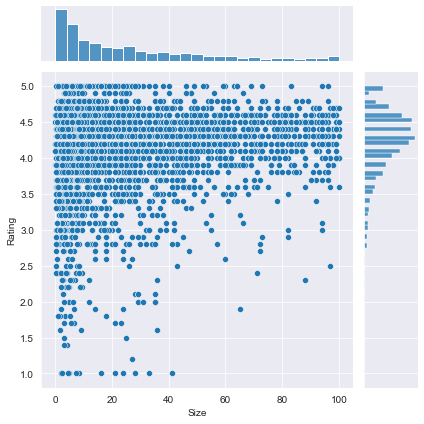

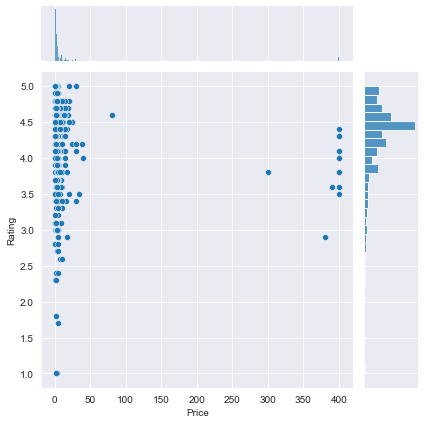

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Selecionando as linhas em que os valores de 'Rating' e 'Size' existem (não são nulos) 
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps["Size"].isnull())]

# 'Subsetting' para categorias com pelo menos 250 aplicativos
large_categories = apps_with_size_and_rating_present.groupby(["Category"]).filter(lambda x: len(x) >= 250)

# Plotando Size vs. Rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Selecionando os apps no qual seu 'Type' é 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']


# Plotando Price vs. Rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relação entre categoria e preço dos aplicativos
<p>Como as empresas e os desenvolvedores devem sobreviver? Quais estratégias de monetização as empresas podem utilizar para maximizar o lucro? Os custos dos aplicativos são amplamente baseados em recursos, complexidade e plataforma.</p>
<p>Há muitos fatores a serem considerados ao selecionar a estratégia de preços certa para seu aplicativo móvel. É importante considerar a disposição do seu cliente em pagar pelo seu aplicativo. Um preço errado pode "quebrar" o negócio antes mesmo do download acontecer. Clientes em potencial podem ficar desanimados com o que consideram um custo absurdo, podem excluir um aplicativo que baixaram depois de receber muitos anúncios ou simplesmente não receber o valor do dinheiro.</p>
<p>Diferentes categorias exigem diferentes faixas de preço. Alguns aplicativos simples e usados diariamente, como o aplicativo da calculadora, provavelmente deveriam ser mantidos gratuitos. No entanto, faria sentido cobrar por um aplicativo médico altamente especializado que diagnostica pacientes diabéticos. Abaixo, vemos que os aplicativos <em>Medical and Family</em> são os mais caros. Alguns aplicativos médicos chegam a custar até \$80! Já os aplicativos de jogos costumam ter preços razoáveis - abaixo de \$20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


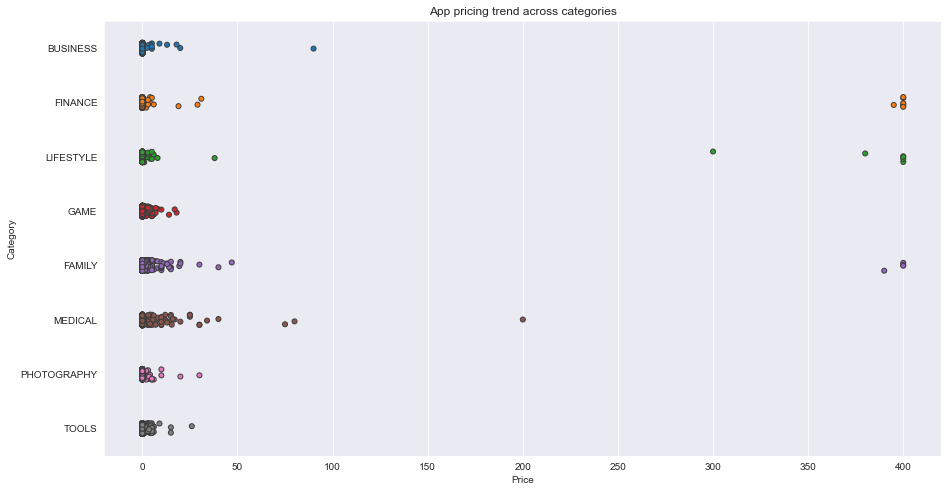

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecionando algumas categorias populares de aplicativos
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examinando a tendência de preço plotando 'Price' vs. 'Category'
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps que possui preço superior a $200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 8.Filtrando aplicativos "lixo" (junk apps)
<p>Parece que muitos dos aplicativos realmente caros são aplicativos "lixo". Ou seja, aplicativos que realmente não têm um propósito. Alguns desenvolvedores de aplicativos podem criar um aplicativo chamado <em>I Am Rich Premium</em> ou <em>app mais caro de todos (H)</em> apenas por diversão ou para testar suas habilidades em desenvolvimento de aplicativos. Alguns desenvolvedores até fazem isso com intenção maliciosa e tentam ganhar dinheiro esperando que as pessoas cliquem acidentalmente em comprar em seu aplicativo na loja.</p>
<p>Vamos filtrar esses "junk apps" e refazer nossa visualização.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

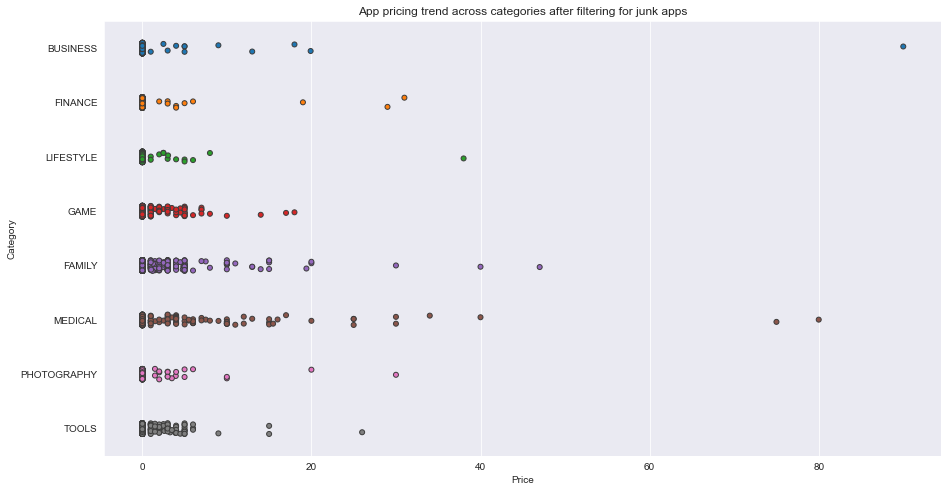

In [8]:
# Selecionando apps com preço abaixo de $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examinando 'Price' vs. 'Category' com os aplicativos autênticos (apps_under 100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularidade dos aplicativos pagos vs. aplicativos gratuitos
<p>Para aplicativos na Play Store hoje, existem cinco tipos de estratégias de precificação: grátis, freemium, pago, "paymium" e assinatura. Vamos focar apenas em aplicativos gratuitos e pagos. Algumas características dos aplicativos gratuitos são:</p>
<ul>
<li>Gratuito para download.</li>
<li>Sua principal fonte de renda geralmente vem de anúncios.</li>
<li>Muitas vezes criado por empresas que possuem outros produtos e o aplicativo serve como uma extensão desses produtos.</li>
<li>Pode servir como uma ferramenta para retenção de clientes, comunicação e atendimento ao cliente.</li>
</ul>
<p>Algumas características dos aplicativos pagos são:</p>
<ul>
<li>Usuários são solicitados a pagar uma vez pelo aplicativo para fazer o download e usá-lo.</li>
<li>O usuário não consegue conhecer a fundo o aplicativo antes de comprá-lo.</li>
</ul>
<p>Aplicativos pagos são baixados tanto quanto aplicativos gratuitos? Acontece que os aplicativos pagos têm um número relativamente menor de instalações do que os aplicativos gratuitos, embora a diferença não seja tão gritante quanto possa parecer.</p>

In [9]:
trace0 = go.Box(
    # Dados para aplicativos pagos
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Dados para aplicativos gratuitos
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Adicionando trace0 e trace1 à lista para plotagem
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. Análise de Sentimento das avaliações dos usuários
<p>A mineração de dados de avaliações de usuários para determinar como as pessoas se sentem em relação ao seu produto, marca ou serviço pode ser feita usando uma técnica chamada Análise de Sentimento. As avaliações dos usuários podem ser analisadas para identificar se o "humor" é positivo, negativo ou neutro em relação a esse aplicativo. Por exemplo, palavras positivas em uma avaliação  podem incluir palavras como 'incrível', 'amigável', 'bom', 'ótimo' e 'amor'. Palavras negativas podem ser palavras como 'malware', 'ódio', 'problema', 'reembolso' e 'incompetente'.</p>
<p>Ao traçar pontuações de polaridade de sentimento de avaliações para aplicativos pagos e gratuitos observamos que aplicativos gratuitos recebem muitos comentários severos, conforme indicado pelos valores discrepantes no eixo 'y' negativo. As avaliações de aplicativos pagos parecem nunca ser extremamente negativas. Isso pode indicar algo sobre a qualidade do aplicativo, ou seja, os aplicativos pagos são de qualidade superior aos aplicativos gratuitos em média. A pontuação média de polaridade para aplicativos pagos é um pouco maior do que para aplicativos gratuitos, confirmando então nossa observação anterior.</p>
<p>Neste notebook, analisamos mais de dez mil aplicativos da Google Play Store. Podemos utilizar essas descobertas para informar nossas decisões, caso desejemos criar um aplicativo por conta própria.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

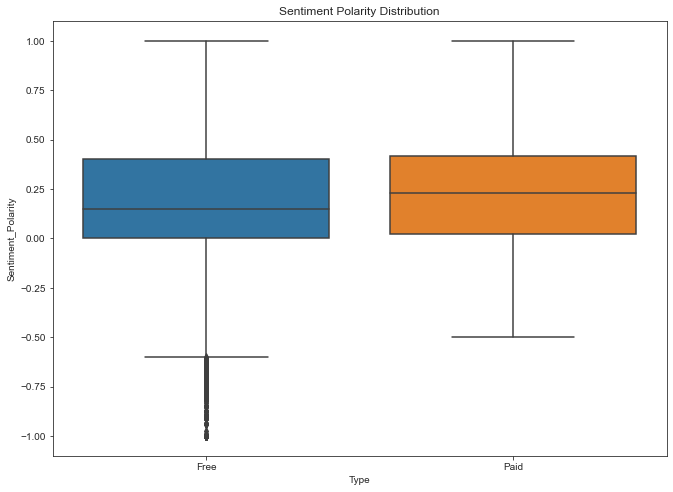

In [10]:
# Carregando user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Juntando os dois dataframes
merged_df = apps.merge(reviews_df)

# Retirando os valores "NA" das colunas Sentiment e Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Polaridade de sentimento sobre avaliação do usuário para aplicativos "Paid" vs. "Free"
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')